In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

from model_creation import preprocess_dataset

warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_theme()
sns.set_theme(style="whitegrid")

In [3]:
fdf = pd.read_csv("data/result.csv",index_col=0, parse_dates=['timestamp'], converters={
    'block_duration': lambda x: pd.to_timedelta(x),
    'session_duration': lambda x: pd.to_timedelta(x),
    'user_listen_time': lambda x: pd.to_timedelta(x),
})

In [4]:
fdf = preprocess_dataset(fdf)
Y = fdf['isskipped']
X = fdf.drop(columns=['isskipped'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=21)

# Random Forest

In [6]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

joblib.dump(clf, 'random_forest.pkl')

Accuracy: 0.7431033667662771
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81    511858
           1       0.68      0.56      0.61    291940

    accuracy                           0.74    803798
   macro avg       0.72      0.70      0.71    803798
weighted avg       0.74      0.74      0.74    803798


['random_forest.pkl']

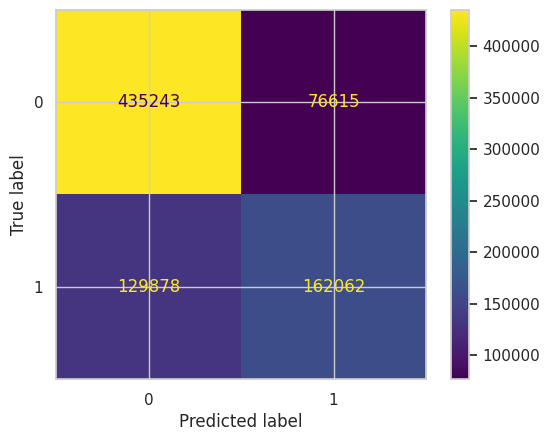

In [7]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()

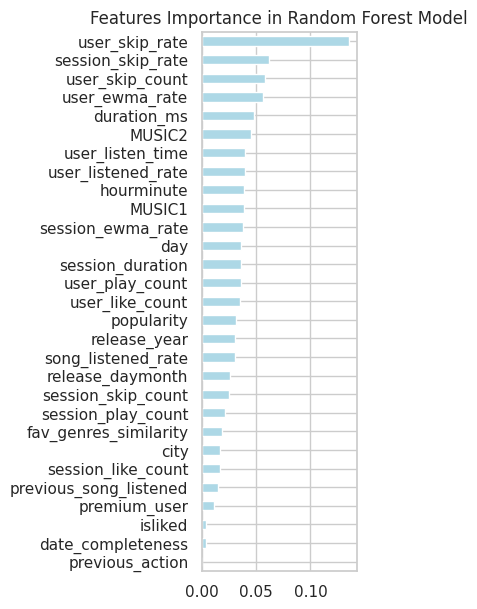

In [14]:
feature_importances = clf.feature_importances_
feature_names = X.columns
importances = pd.Series(feature_importances, index=feature_names)
importances_sorted = importances.sort_values()
plt.figure(figsize=(2,7))
importances_sorted.plot(kind='barh', color='lightblue')
plt.title('Features Importance in Random Forest Model')
plt.show()

# Decision Tree

In [15]:
fdf = preprocess_dataset(pd.read_csv("data/result.csv",index_col=0, parse_dates=['timestamp'], converters={
    'block_duration': lambda x: pd.to_timedelta(x),
    'session_duration': lambda x: pd.to_timedelta(x),
    'user_listen_time': lambda x: pd.to_timedelta(x),
}))
Y = fdf['isskipped']
X = fdf.drop(columns=['isskipped'])
# X = fdf[['user_skip_rate', 'MUSIC1', 'MUSIC2', 'session_duration', 'duration_ms']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=21)

clf = DecisionTreeClassifier()

# clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
joblib.dump(clf, 'decision_tree.pkl')

Accuracy: 0.6698648167823259
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74    511858
           1       0.54      0.55      0.55    291940

    accuracy                           0.67    803798
   macro avg       0.64      0.64      0.64    803798
weighted avg       0.67      0.67      0.67    803798


['decision_tree.pkl']

Zostały również poczynione próby z siecią neuronową, jednakże nie przyniosła ona lepszych rezultatów, niz model RandomForest

```py
model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),

    # Hidden layer 1
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    # Hidden layer 2
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    # Hidden layer 3
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    # Output layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
model.fit(X_train, y_train, epochs=100, batch_size=1024, validation_split=0.1, callbacks=[early_stopping, model_checkpoint])
```

OUT:
Epoch 17/100
1649/1649 [==============================] - 20s 12ms/step - loss: 0.5052 - accuracy: 0.7400 - val_loss: 0.5492 - val_accuracy: 0.7337
25119/25119 [==============================] - 25s 1ms/step - loss: 0.5369 - accuracy: 0.7113
Test Accuracy: 0.7113217711448669